# Mooring Synthesis of Initial NC data (offline)

## 24BS-2A

- from netcdf files
- plot all depths of each parameter on each other for comparative purposes
- Temperature, Salinity, Pressure in this notebook.  See companion for Oxygen, Chlor, ADCP/currents, etc

In [1]:
import xarray as xa
import pandas as pd
import numpy as np
import datetime
import cmocean

In [2]:
#wrap the plot in image settings for visual appeal
# may be able to make this cleaner or just a preset
%run '../../../settings/mpl_plot_settings.py'

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker


In [3]:
ncfiles = '/Users/bell/ecoraid/2023/Moorings/23bs2c/final_data_cf/*eco*.nc'
ncfiles_2 = '/Users/bell/ecoraid/2024/Moorings/24bspr2a/final_data_cf/*eco*.nc'
# ncfiles_2 = '*.nc'
mfd = xa.open_mfdataset(ncfiles, chunks=None,)
mfd_2 = xa.open_mfdataset(ncfiles_2, chunks=None)


In [4]:
mfd

<xarray.Dataset>
Dimensions:             (time: 9042, depth: 3, latitude: 1, longitude: 1)
Coordinates:
  * time                (time) datetime64[ns] 2023-08-29 ... 2024-09-08T17:00:00
  * latitude            (latitude) float64 56.86
  * longitude           (longitude) float64 -164.1
  * depth               (depth) float64 12.0 23.0 45.0
Data variables:
    chlor_fluorescence  (time, depth, latitude, longitude) float64 dask.array<chunksize=(9042, 1, 1, 1), meta=np.ndarray>
Attributes: (12/15)
    Latitude_DegMMddW:                      56 51.630 N
    Longitude_DegMMddN:                     164 03.290 W
    MooringID:                              23BS-2C
    platform_deployment_date:               2023-08-29T00:00:00Z
    platform_deployment_cruise_name:        AQ2301
    platform_recovery_date:                 2024-09-08T17:00:00Z
    ...                                     ...
    InstrumentSerialNumber:                 027
    InstrumentType:                         Eco-Fluorometer FLS
    date_created:                           2024-09-17T12:51:05Z
    date_modified:                          2024-10-16 12:52:34.182446
    QC_indicator:                           ProbablyGood
    history:                                Trimmed to deployment.\nTrimmed t...

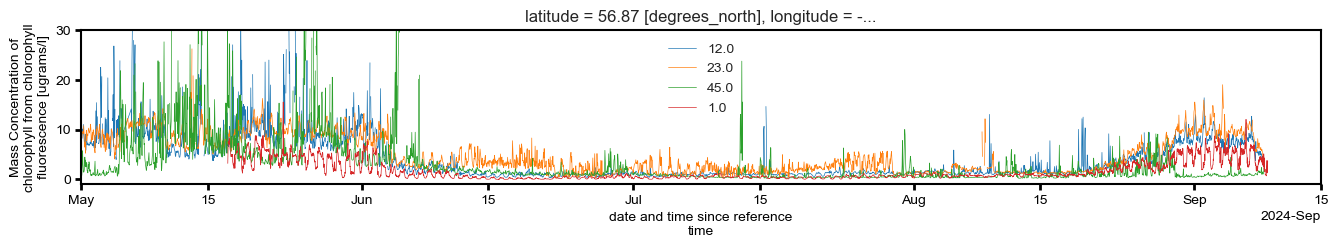

In [15]:
fig, ax = plt.subplots(1,figsize=(16, 2))
for depth in mfd.isel({'latitude':0,'longitude':0}).depth:
    mfd.isel({'latitude':0,'longitude':0}).sel({'depth':depth}).chlor_fluorescence.plot(x="time",hue="depth",ax=ax,linewidth=.5,label=depth.values)
ax.legend()

for depth in mfd_2.isel({'latitude':0,'longitude':0}).depth:
    mfd_2.isel({'latitude':0,'longitude':0}).sel({'depth':depth}).chlor_fluorescence.plot(x="time",hue="depth",
                                                                                          ax=ax,linewidth=.5,label=depth.values,
                                                                                          ylim=[-1,30],
                                                                                         xlim=[datetime.date(2024,5,1),datetime.date(2024,9,15)])

ax.legend()

<>:27: SyntaxWarning: invalid escape sequence '\m'
<>:27: SyntaxWarning: invalid escape sequence '\m'
/var/folders/6r/n_mpcj7d7pdf9ncqvjy5vb8c0000jm/T/ipykernel_87493/3216414084.py:27: SyntaxWarning: invalid escape sequence '\m'
  cbar.ax.set_ylabel('Chlorophyll ($\mu$gram/L)')


Text(0, 0.5, 'Depth (m)')

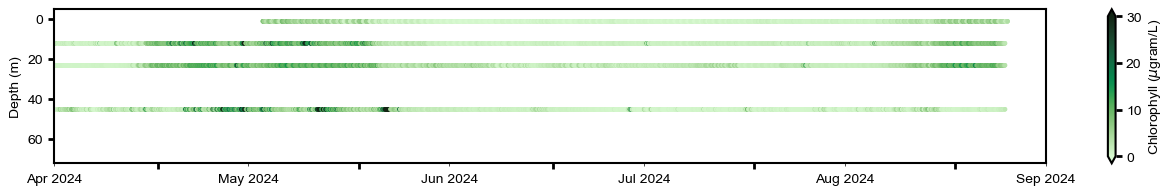

In [12]:
fig, ax = plt.subplots(1,figsize=(16, 2))
for depth in mfd.isel({'latitude':0,'longitude':0}).depth:
    temp = mfd.isel({'latitude':0,'longitude':0}).sel({'depth':depth})
    ax.scatter(temp["time"],
               np.ones_like(temp["chlor_fluorescence"].values)*temp["depth"].values,
               c=temp["chlor_fluorescence"],cmap=cmocean.cm.algae,s=5,vmin=0,vmax=30)

for depth in mfd_2.isel({'latitude':0,'longitude':0}).depth:
    temp = mfd_2.isel({'latitude':0,'longitude':0}).sel({'depth':depth})
    cs = ax.scatter(temp["time"],
               np.ones_like(temp["chlor_fluorescence"].values)*temp["depth"].values,
               c=temp["chlor_fluorescence"],cmap=cmocean.cm.algae,s=5,vmin=0,vmax=30)

# ax.set_ylim([50,0])
ax.set_xlim([datetime.date(2024,4,15),datetime.date(2024,9,15)])

ax.xaxis.set_major_locator(DayLocator(bymonthday=1))
ax.xaxis.set_minor_locator(DayLocator(bymonthday=15))
ax.xaxis.set_minor_formatter(DateFormatter('%b %Y'))
ax.xaxis.set_major_formatter(DateFormatter(''))
ax.xaxis.set_tick_params(which='major', pad=3)
ax.xaxis.set_tick_params(which='minor', pad=5)
# ax.invert_yaxis()
ax.set_ylim([72,-5])

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Chlorophyll ($\mu$gram/L)')
ax.set_ylabel('Depth (m)')

##Prawler

In [7]:
prawler = pd.read_csv('/Users/bell/ecoraid/2024/Moorings/24bspr2a/rawconverted/praw/24BSPR-2A_preliminary_Prawler.csv',parse_dates=True,index_col='time (UTC)')

(72.0, -5.0)

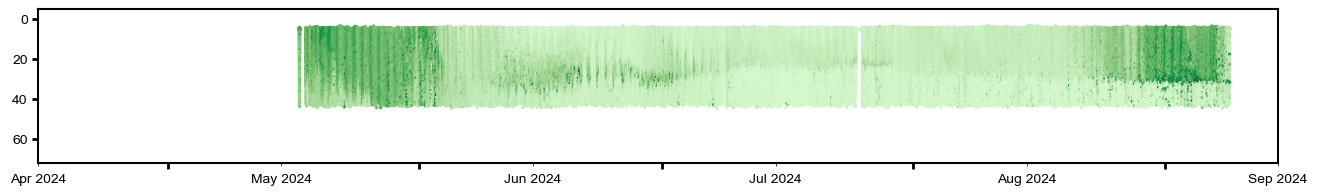

In [8]:
upper_temp = 30
lower_temp = 0

fig, ax = plt.subplots(1,figsize=(16, 2))
# mfd.chlor_fluorescence.T.plot(ax=ax,vmin=lower_temp,vmax=upper_temp,cmap=cmocean.cm.algae)

ax.scatter(prawler.index,prawler['SB_Depth'],c=prawler['wetlab_Chlorophyll_ug/l'],
           s=2,cmap=cmocean.cm.algae,vmin=lower_temp,vmax=upper_temp)
            
ax.xaxis.set_major_locator(DayLocator(bymonthday=1))
ax.xaxis.set_minor_locator(DayLocator(bymonthday=15))
ax.xaxis.set_minor_formatter(DateFormatter('%b %Y'))
ax.xaxis.set_major_formatter(DateFormatter(''))
ax.xaxis.set_tick_params(which='major', pad=3)
ax.xaxis.set_tick_params(which='minor', pad=5)

ax.set_xlim([datetime.date(2024,4,15),datetime.date(2024,9,15)])
ax.set_ylim([72,-5])

In [9]:
import plotly.express as px

In [10]:
for depth in mfd.isel({'latitude':0,'longitude':0}).depth:
    mfd.isel({'latitude':0,'longitude':0}).sel({'depth':depth}).chlor_fluorescence.plot(x="time",hue="depth",ax=ax,linewidth=.5)

for depth in mfd_2.isel({'latitude':0,'longitude':0}).depth:
    mfd_2.isel({'latitude':0,'longitude':0}).sel({'depth':depth}).chlor_fluorescence.plot(x="time",hue="depth",ax=ax,linewidth=.5)

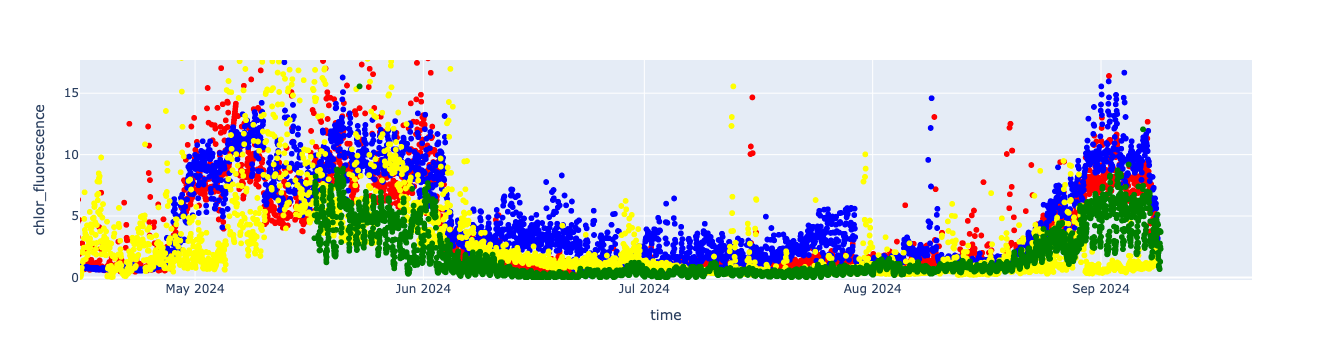

In [13]:
fig = px.scatter(mfd.isel({'latitude':0,'longitude':0}).isel({'depth':0}).to_dataframe(),y='chlor_fluorescence', color_discrete_sequence=['red'])
fig2 = px.scatter(mfd.isel({'latitude':0,'longitude':0}).isel({'depth':1}).to_dataframe(),y='chlor_fluorescence', color_discrete_sequence=['blue'])
fig3 = px.scatter(mfd.isel({'latitude':0,'longitude':0}).isel({'depth':2}).to_dataframe(),y='chlor_fluorescence', color_discrete_sequence=['yellow'])
fig4 = px.scatter(mfd_2.isel({'latitude':0,'longitude':0}).isel({'depth':0}).to_dataframe(),y='chlor_fluorescence', color_discrete_sequence=['green'])
fig.add_trace(fig2.data[0])
fig.add_trace(fig3.data[0])
fig.add_trace(fig4.data[0])

fig.show()

In [16]:
import EcoFOCIpy.math.lanzcos as lanzcos

In [31]:
mfd_2.depth

<xarray.DataArray 'depth' (depth: 1)>
array([1.])
Coordinates:
  * depth    (depth) float64 1.0
Attributes:
    epic_key:       D_3
    generic_name:   depth
    units:          meter
    long_name:      depth below surface (meters)
    standard_name:  depth
    positive:       down

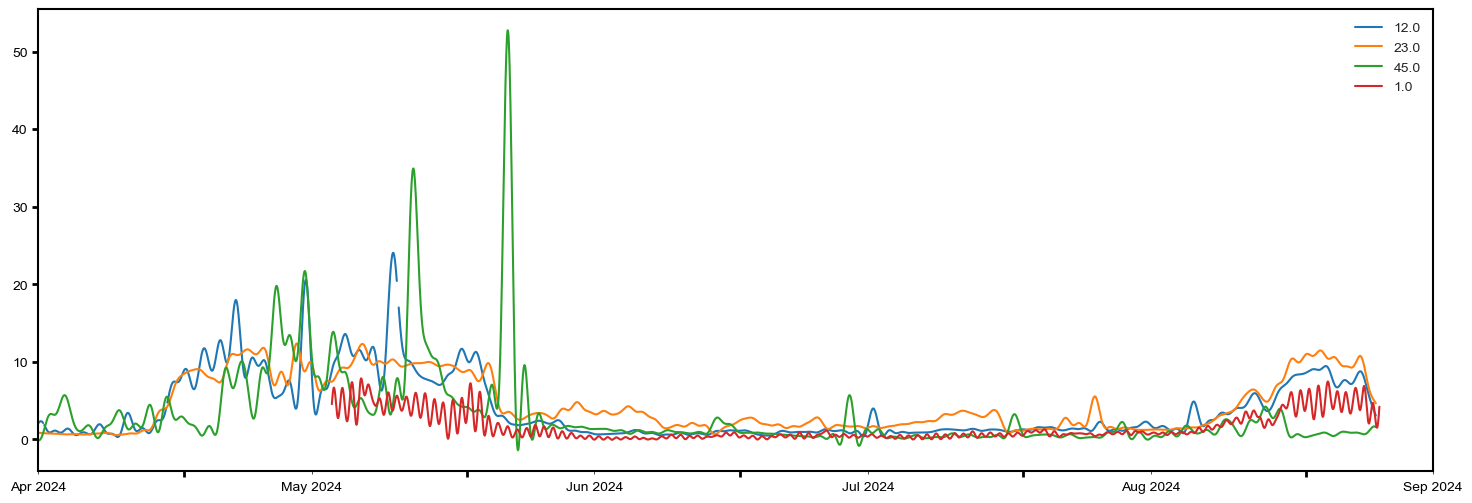

In [49]:
fig, (ax1) = plt.subplots(1,1,sharex='col',figsize=(18,6))

for depth in mfd.depth:
    dfn = f'chlor_fluorescence'
    dft = mfd.sel({'depth':depth}).isel({'latitude':0,'longitude':0}).to_dataframe()
    #
    ## missing data fill limited by number of hours to linearly interpolate
    temp = dft[dfn].interpolate(method='time',limit=6)
    
    # get index of missing data that wasn't filled
    # the remaining missing data will continue to be missing after analysis
    # this data and the edges of the timeseries need to have the effects of the filter window accounted for
    
    missing_index = np.isnan(temp)
    temp = dft[dfn].interpolate(method='time')
    
    #address gaps at beginning and end... back fill... and forward fill at end... 
    # the filter window will correct small gaps at the tails but will become worse as the leading gaps get bigger
    temp.bfill(inplace=True)
    temp.ffill(inplace=True)
    
    #filter data with lanzcos filter
    dft[f'{dfn}_{depth.values}_f35'] = lanzcos.lanzcos(temp.values,1,35) + dft[dfn].mean()
    dft.loc[missing_index.values,f'{dfn}_{depth.values}_f35'] = np.nan

    ax1.plot(dft.index.values, dft[f'{dfn}_{depth.values}_f35'],linewidth=1.5, label=depth.values)
    # ax1.plot(dft.index.values, dft[f'{dfn}'],linewidth=1.5, label=dfn)
    dft[f'{dfn}_{depth.values}_f35'].to_csv(f'23BS2C_{depth.values}_f35.csv')
ax1.legend()

for depth in mfd_2.depth:
    dfn = f'chlor_fluorescence'
    dft = mfd_2.sel({'depth':depth}).isel({'latitude':0,'longitude':0}).to_dataframe()
    #
    ## missing data fill limited by number of hours to linearly interpolate
    temp = dft[dfn].interpolate(method='time',limit=6)
    
    # get index of missing data that wasn't filled
    # the remaining missing data will continue to be missing after analysis
    # this data and the edges of the timeseries need to have the effects of the filter window accounted for
    
    missing_index = np.isnan(temp)
    temp = dft[dfn].interpolate(method='time')
    
    #address gaps at beginning and end... back fill... and forward fill at end... 
    # the filter window will correct small gaps at the tails but will become worse as the leading gaps get bigger
    temp.bfill(inplace=True)
    temp.ffill(inplace=True)
    
    #filter data with lanzcos filter
    dft[f'{dfn}_{depth.values}_f35'] = lanzcos.lanzcos(temp.values,1,35) + dft[dfn].mean()
    dft.loc[missing_index.values,f'{dfn}_{depth.values}_f35'] = np.nan

    ax1.plot(dft.index.values, dft[f'{dfn}_{depth.values}_f35'],linewidth=1.5, label=depth.values)
    # ax1.plot(dft.index.values, dft[f'{dfn}'],linewidth=1.5, label=dfn)

                
    ax1.xaxis.set_major_locator(DayLocator(bymonthday=1))
    ax1.xaxis.set_minor_locator(DayLocator(bymonthday=15))
    ax1.xaxis.set_minor_formatter(DateFormatter('%b %Y'))
    ax1.xaxis.set_major_formatter(DateFormatter(''))
    ax1.xaxis.set_tick_params(which='major', pad=3)
    ax1.xaxis.set_tick_params(which='minor', pad=5)
    
    ax1.set_xlim([datetime.date(2024,4,15),datetime.date(2024,9,15)])
    dft[f'{dfn}_{depth.values}_f35'].to_csv(f'24BSPR2A_{depth.values}_f35.csv')
ax1.legend()
 
# fig.savefig(file.replace('csv','png'))

chlor_fluorescence  turbidity      cdom   latitude  \
time                                                                      
2024-05-17 05:00:00            3.195227   0.555547  1.276700  56.867767   
2024-05-17 05:30:00            5.054227   0.552200  1.276700  56.867767   
2024-05-17 06:00:00            6.860273   0.599053  1.276700  56.867767   
2024-05-17 06:30:00            7.200527   0.602400  1.276700  56.867767   
2024-05-17 07:00:00            7.421353   0.649253  1.276700  56.867767   
...                                 ...        ...       ...        ...   
2024-09-09 00:30:00            3.781093   0.398253  2.398193  56.867767   
2024-09-09 01:00:00            1.282147   0.354747  2.473293  56.867767   
2024-09-09 01:30:00            2.486553   0.538813  2.548393  56.867767   
2024-09-09 02:00:00            2.317553   0.505347  2.553400  56.867767   
2024-09-09 02:30:00            3.702227   0.408293  2.413213  56.867767   

                      longitude  depth  chlor_fluorescence_1.0_f35  
time                                                                
2024-05-17 05:00:00 -164.058517    1.0                    4.539457  
2024-05-17 05:30:00 -164.058517    1.0                    4.862232  
2024-05-17 06:00:00 -164.058517    1.0                    5.172722  
2024-05-17 06:30:00 -164.058517    1.0                    5.465577  
2024-05-17 07:00:00 -164.058517    1.0                    5.736013  
...                         ...    ...                         ...  
2024-09-09 00:30:00 -164.058517    1.0                    2.934998  
2024-09-09 01:00:00 -164.058517    1.0                    3.236668  
2024-09-09 01:30:00 -164.058517    1.0                    3.553162  
2024-09-09 02:00:00 -164.058517    1.0                    3.879369  
2024-09-09 02:30:00 -164.058517    1.0                    4.209994  

[5516 rows x 7 columns]